# Post-analysis of Spindles, SWR and Down-states.

Restart from SWR and spindles verified files. They are most likely the .csv files.

## Load events files and packages

In [21]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, Cursor
from scipy import fftpack
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid", palette="muted")
%matplotlib widget

SpindlesS1 = pd.read_csv('./EventsFiles/Spindleproperties_S1_1.csv')
SpindlesPFC = pd.read_csv('./EventsFiles/Spindleproperties_PFC_1.csv')
SWRCA1 = pd.read_csv('./EventsFiles/SWRproperties_1.csv')
LFPwakeremoved = np.load('LFPwakeremoved_2.npy', mmap_mode= 'r')
All = np.load('RawDataChannelExtractedDS_2.npy', mmap_mode= 'r')
PFC = All[:, 1]
PFCwakeremoved = LFPwakeremoved[:,0]


In [18]:
SpindlesS1

,Unnamed: 0,peak time,Duration,peak amp,start time,end time,Max freq,Max int,Avg freq,Avg int
0,0,150.844,941.0,475.0,150.609,151.550,143.0,1965.0,129.0,702.0
1,1,592.542,532.0,619.0,592.361,592.892,143.0,2285.0,130.0,938.0
2,2,597.287,1746.0,520.0,596.448,598.194,143.0,3478.0,129.0,931.0
3,3,730.973,927.0,467.0,730.440,731.367,143.0,2023.0,130.0,671.0


In [19]:
SpindlesPFC

,Unnamed: 0,peak time,Duration,peak amp,start time,end time,Max freq,Max int,Avg freq,Avg int
0,0,151.859,612.0,1716.0,151.526,152.139,143.0,6614.0,128.0,2945.0
1,1,437.244,1084.0,1507.0,436.846,437.930,143.0,7414.0,127.0,2723.0
2,2,479.112,1414.0,1406.0,478.940,480.354,143.0,5699.0,129.0,2384.0
3,3,526.025,435.0,1965.0,525.740,526.175,143.0,7045.0,129.0,2911.0
4,4,527.436,1938.0,1428.0,526.993,528.932,143.0,7300.0,128.0,2466.0
5,5,591.304,834.0,1443.0,590.958,591.792,143.0,8338.0,127.0,2899.0
6,6,687.537,611.0,1574.0,687.223,687.835,143.0,7247.0,127.0,3086.0


In [28]:
SWRCA1
SWRCA1.describe()
r = np.corrcoef(SWRCA1['Duration'], SWRCA1['Avg int'])
r[0, 1] # -0.1757 No correlation!
r = np.corrcoef(SWRCA1['Avg freq'], SWRCA1['Avg int'])
r[0, 1] # 0.2528 No correlation!
r = np.corrcoef(SWRCA1['Avg freq'], SWRCA1['Duration'])
r[0, 1] # -0.2478 No correlation!

-0.24785551907488362

Text(0, 0.5, 'Intensity (AU)')

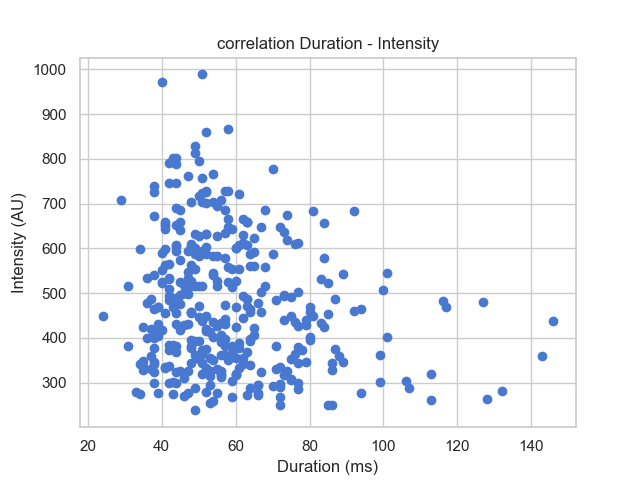

In [31]:
fig, ax = plt.subplots()
ax.plot(SWRCA1['Duration'], SWRCA1['Avg int'], marker='o', linewidth=0)
ax.set_title('correlation Duration - Intensity')
ax.set_xlabel('Duration (ms)')
ax.set_ylabel('Intensity (AU)')